In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# CHECKING THE DATATYPES OF THE COLUMNS

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
df["W"]=df["W"].astype(float)
df.W.dtypes

dtype('float64')

In [8]:
df.dtypes

W      float64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

- removing some of the unwanted features This can help to improve the accuracy of the model and reduce overfitting.

In [9]:
columns_to_remove = ['RA', 'ERA', 'ERA', 'SO', 'CG', 'E','SV']
new_data = df.drop(columns=columns_to_remove)

In [10]:
new_data

,W,R,AB,H,2B,3B,HR,BB,SB,ER,SHO
0,95.0,724,5575,1497,300,42,139,383,104,601,8
1,83.0,696,5467,1349,277,44,156,439,70,653,12
2,81.0,669,5439,1395,303,29,141,533,86,584,10
3,76.0,622,5533,1381,260,27,136,404,68,643,9
4,74.0,689,5605,1515,289,49,151,455,83,746,12
5,93.0,891,5509,1480,308,17,232,570,88,609,10
6,87.0,764,5567,1397,272,19,212,554,63,652,4
7,81.0,713,5485,1370,246,20,217,418,44,646,10
8,80.0,644,5485,1383,278,32,167,436,87,604,12
9,78.0,748,5640,1495,294,33,161,478,71,694,10


# PLOTTING HEATMAP

<AxesSubplot:>

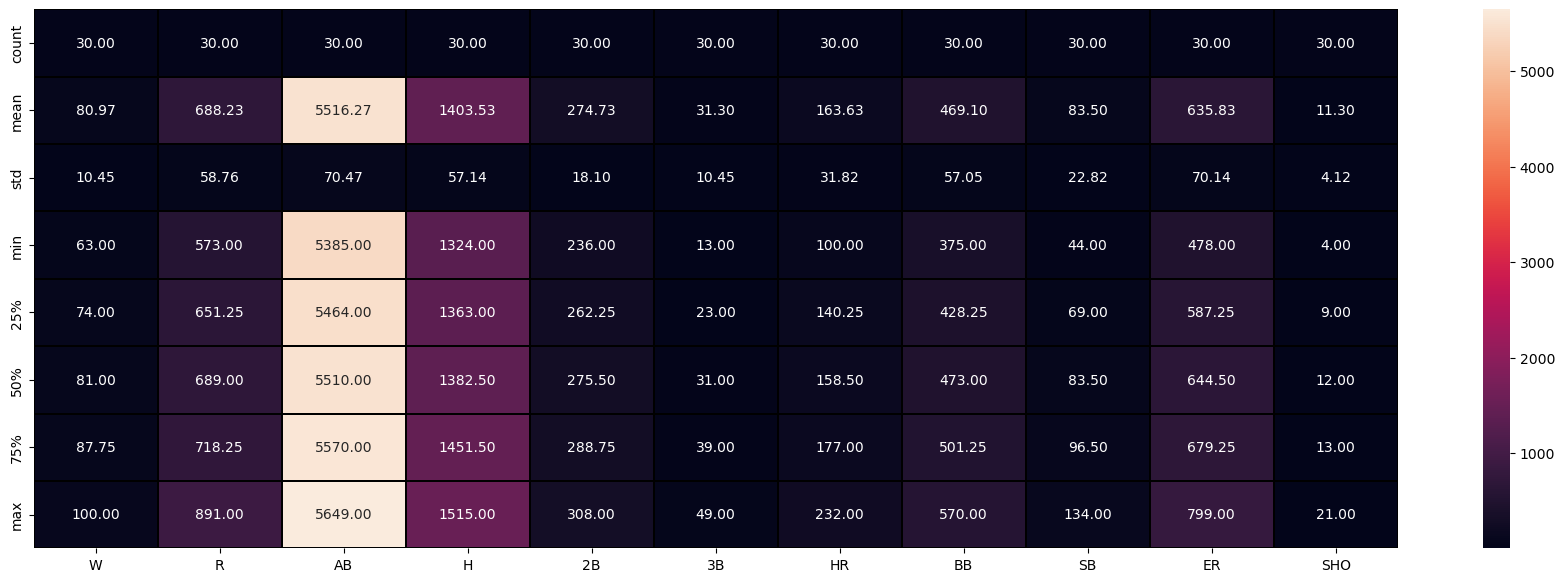

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,7))
sns.heatmap(new_data.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [12]:
# CORRELATION OF COLUMNS WITH THE TARGET COLUMNS 

In [13]:
new_data.corr()['W'].sort_values()

ER    -0.809435
3B    -0.251118
SB    -0.157234
AB    -0.087947
H      0.037612
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
W      1.000000
Name: W, dtype: float64

<AxesSubplot:>

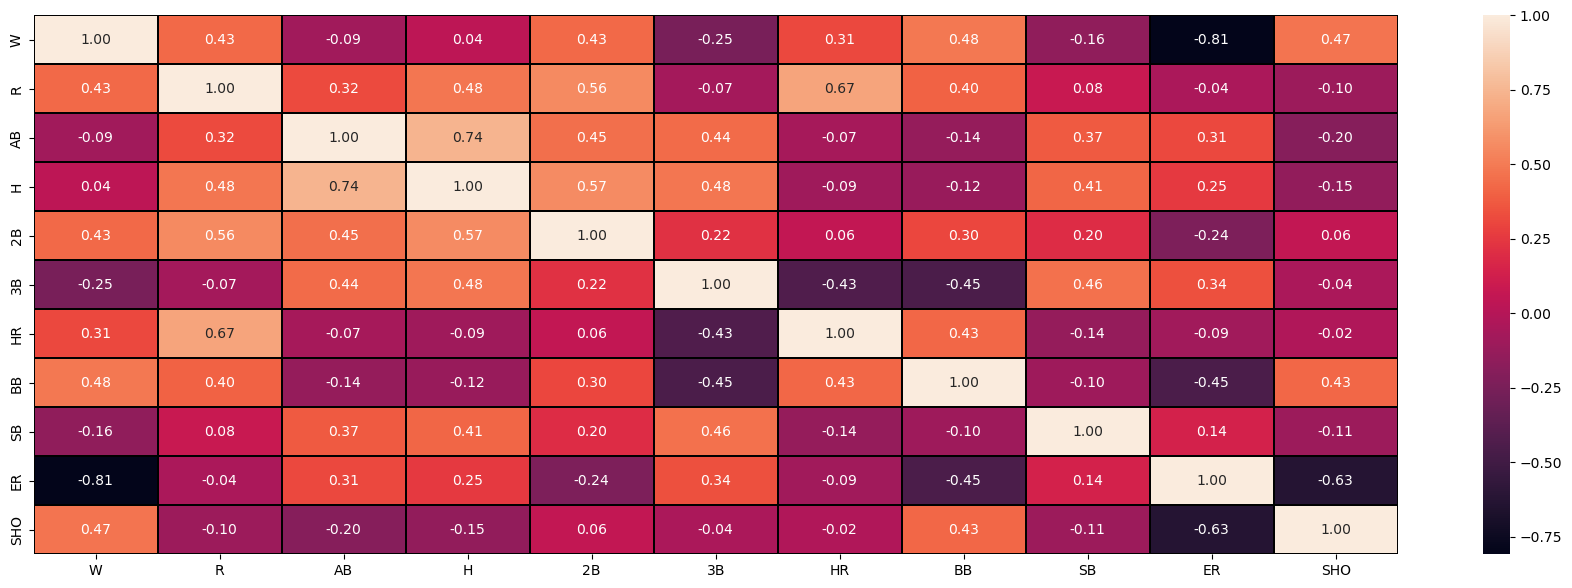

In [14]:
plt.figure(figsize=(22,7))
sns.heatmap(new_data.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

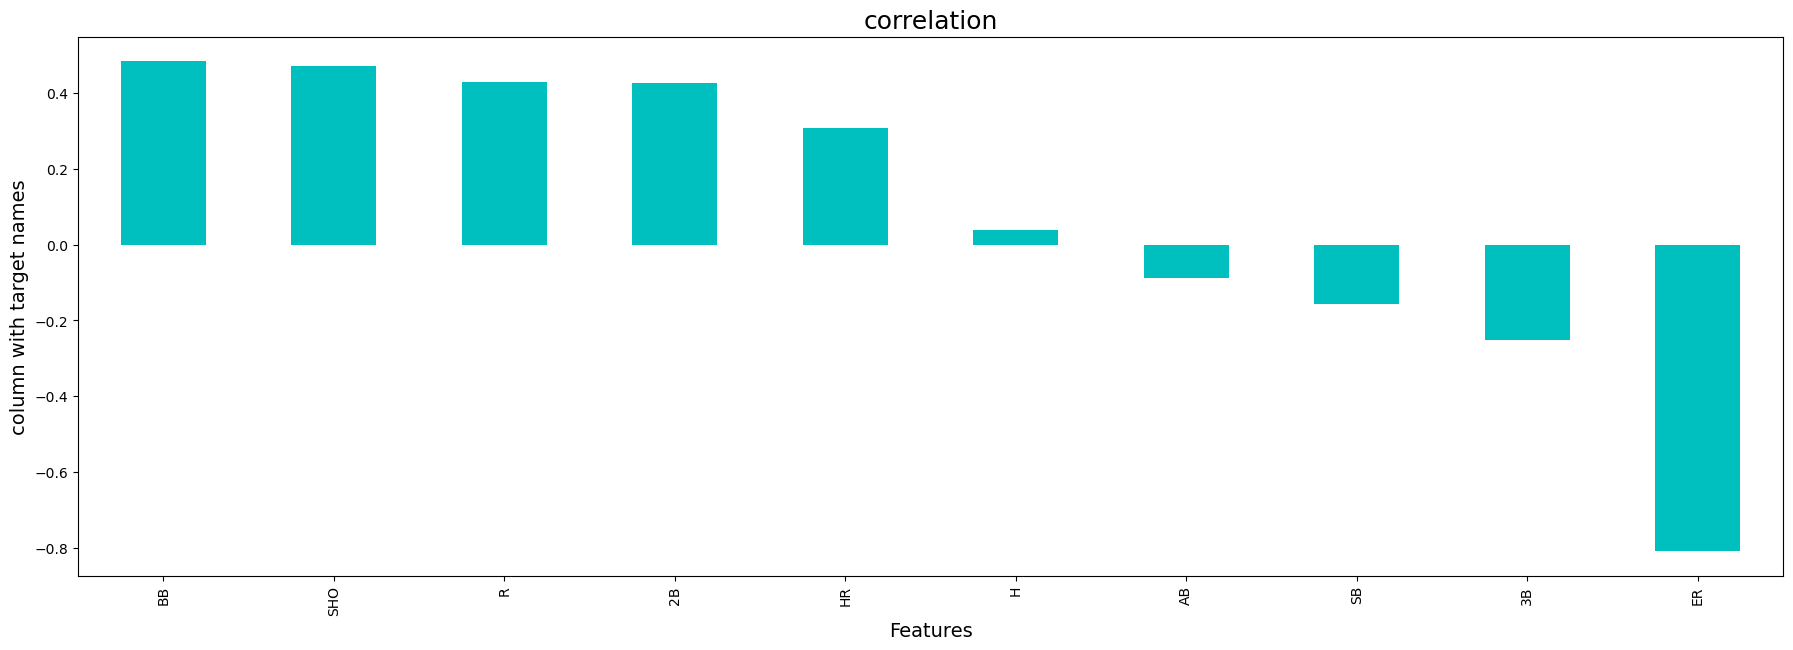

In [15]:
plt.figure(figsize=(22,7))
new_data.corr()["W"].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- WE CAN FIND OUT THE CORRELATION WITH THE TARGET VARIABLE THOUGH THE BARPLOT

In [16]:
new_data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SB     0.479893
ER     0.058710
SHO    0.565790
dtype: float64

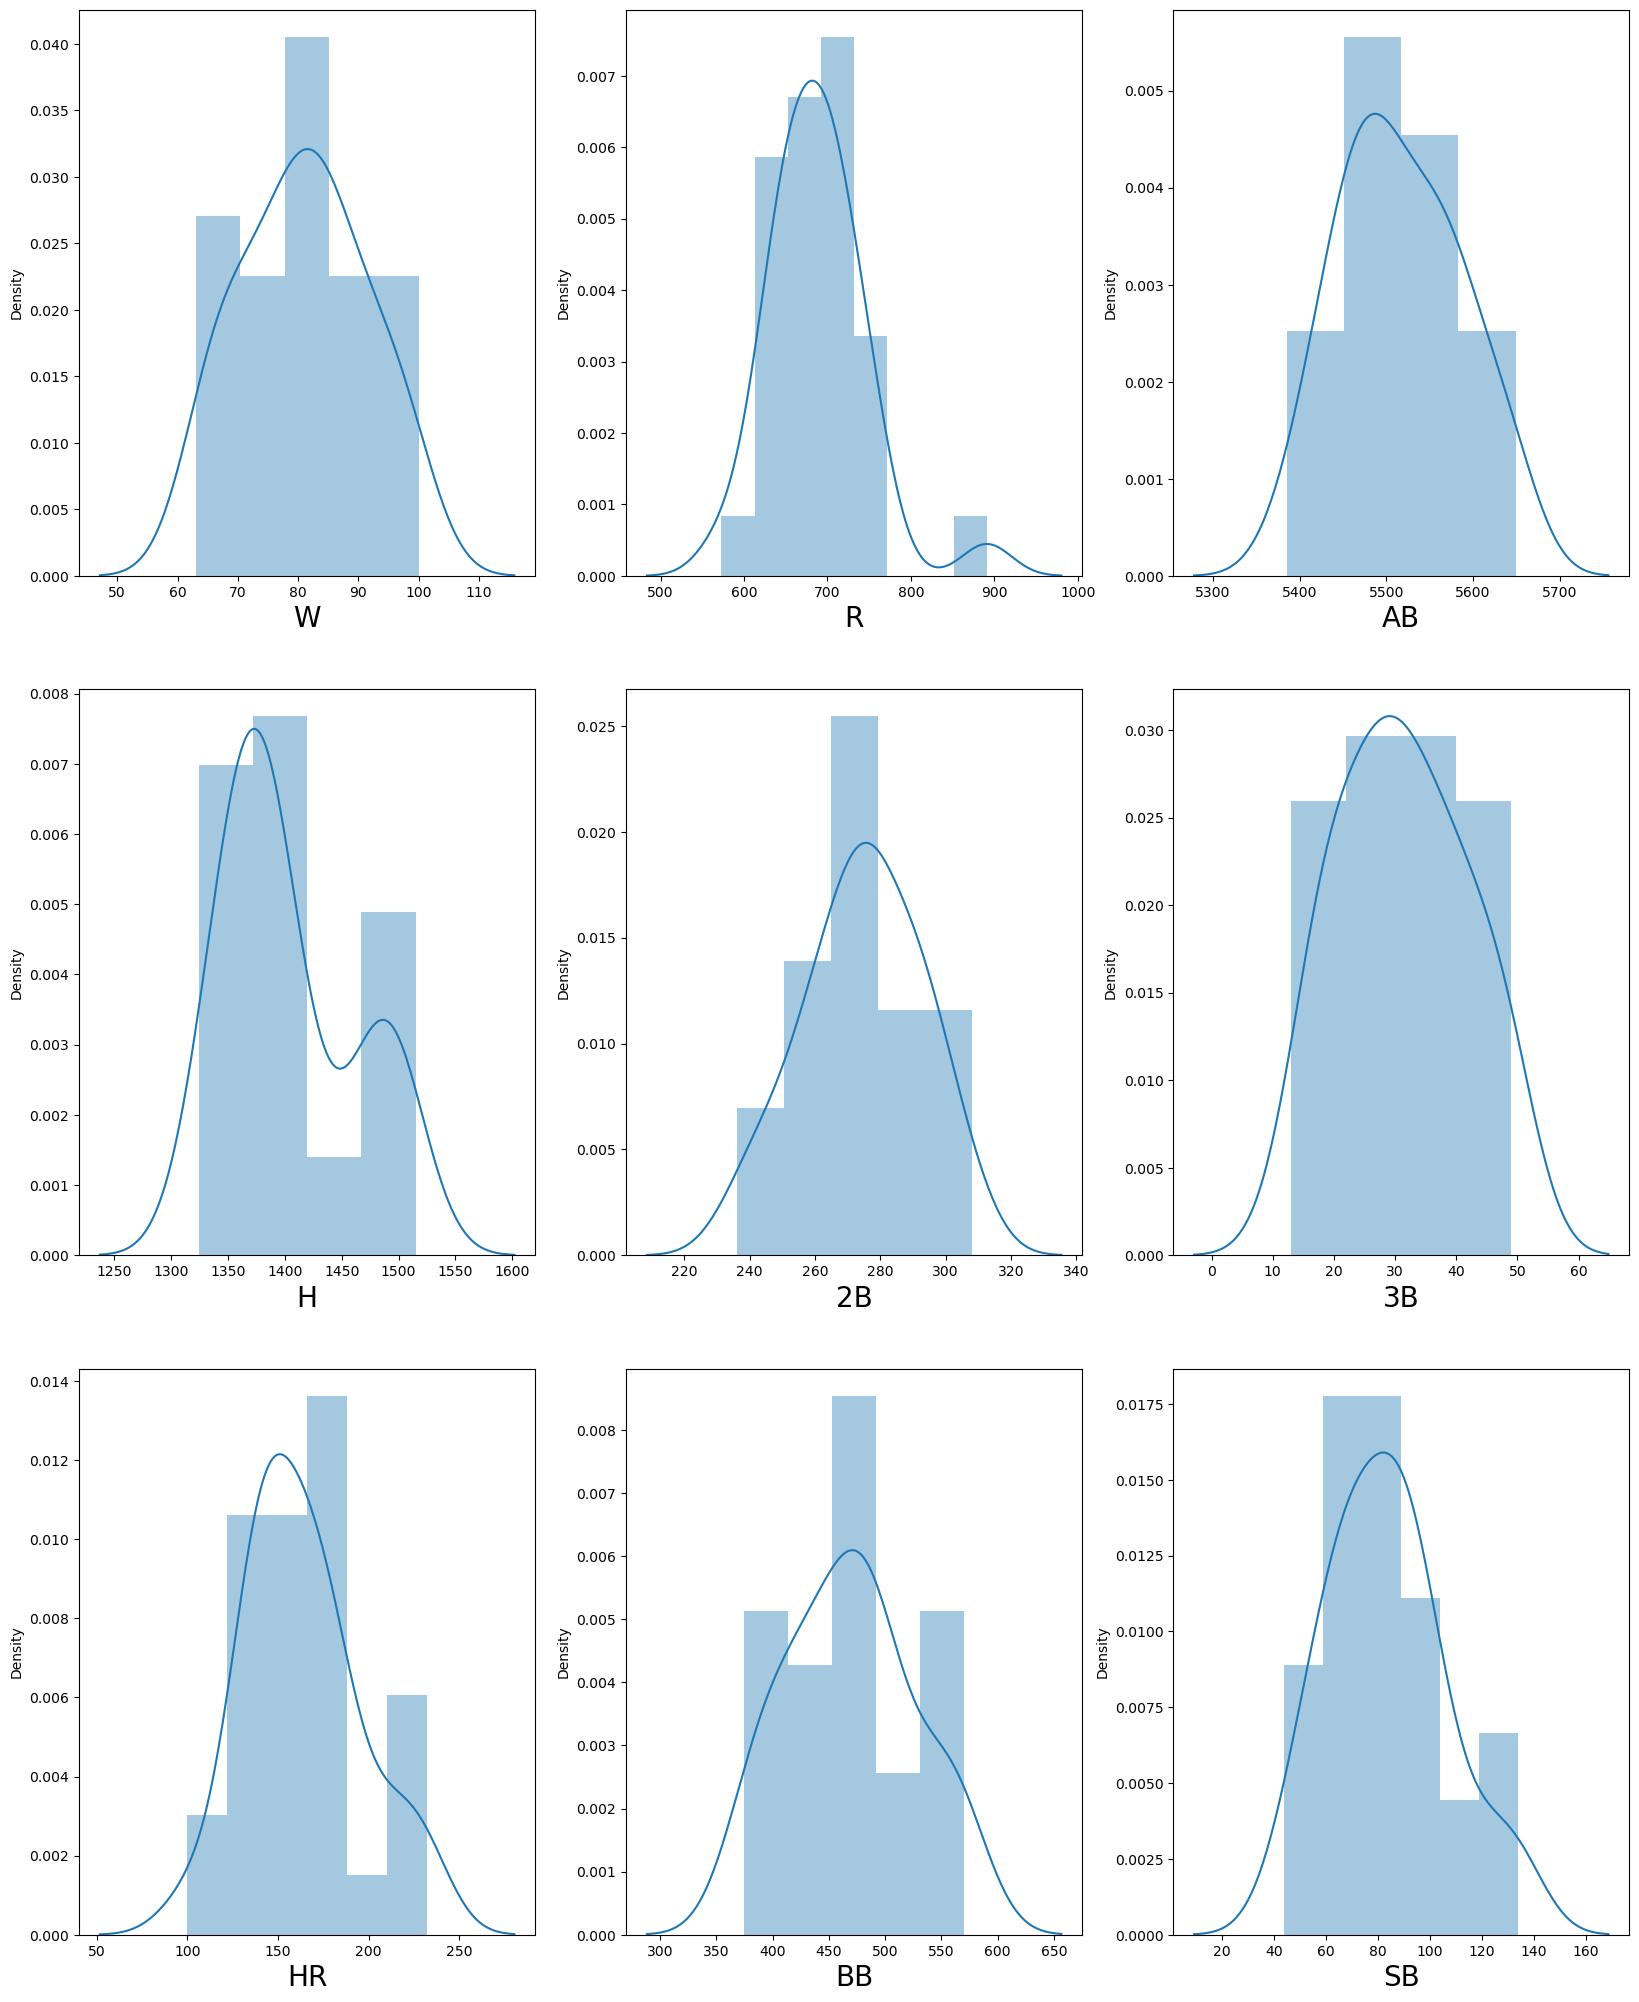

In [19]:
import warnings
warnings.filterwarnings('ignore')
features=['W','R','AB','H','2B','3B','HR','BB','SB','ER','SHO']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in new_data[features]:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


In [21]:
x=new_data.drop("W",axis=1)
y=new_data['W']

- keeping the threshold +/-0.5, there is no skewness

# CHECKING FOR OUTLIERS

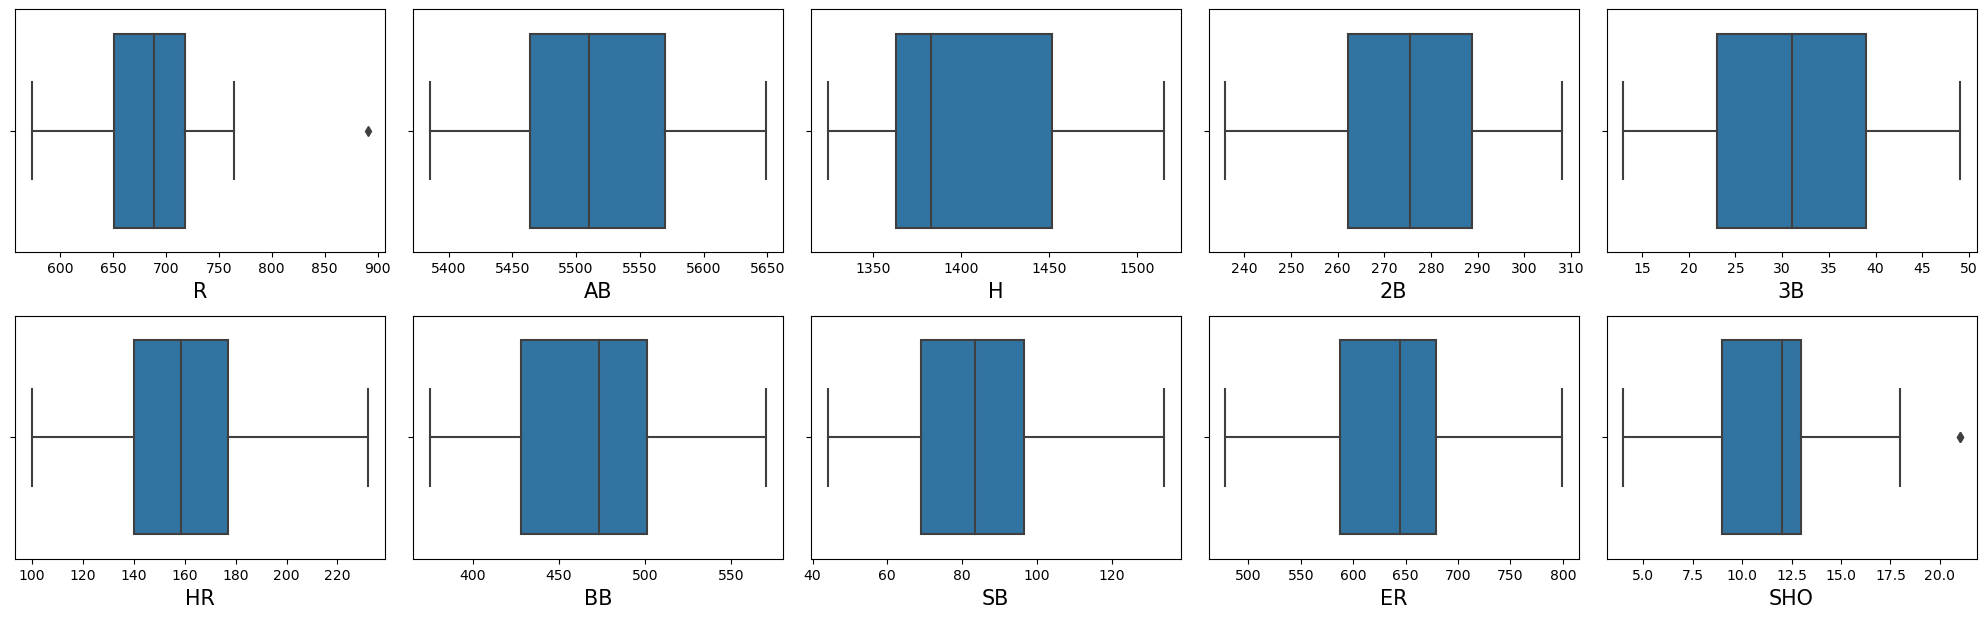

In [22]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=15)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

- DROPPING OUTLIERS

In [23]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(new_data))
z.shape

(30, 11)

In [24]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [25]:
len(np.where(z>3)[0])

1

In [28]:
df_new=new_data[(z<3).all(axis=1)]
print("Old Dataframe",new_data.shape)
print("New DataFrame",df_new.shape)
print("Total_dropped_rows",new_data.shape[0]-df_new.shape[0])

Old Dataframe (30, 11)
New DataFrame (29, 11)
Total_dropped_rows 1


In [29]:
Data_loss=((30-29)/30)*100

In [30]:
Data_loss

3.3333333333333335

- since data loss is less that 10% it can be considered 

In [31]:
from sklearn.preprocessing import MinMaxScaler
nms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
          

at random state 0, the training accuracy is:- 0.8591696731624623
at random state 0, the testing accuracy is:- 0.5141592480145873
at random state 1, the training accuracy is:- 0.9186037851345756
at random state 1, the testing accuracy is:- 0.5285680706132171
at random state 2, the training accuracy is:- 0.9308649717721899
at random state 2, the testing accuracy is:- 0.0030346753419758787
at random state 3, the training accuracy is:- 0.9016020616496353
at random state 3, the testing accuracy is:- 0.44978634501685033
at random state 4, the training accuracy is:- 0.8070664007343038
at random state 4, the testing accuracy is:- 0.8133381457532403
at random state 5, the training accuracy is:- 0.8564990194183637
at random state 5, the testing accuracy is:- 0.5267326871550254
at random state 6, the training accuracy is:- 0.8280137786871676
at random state 6, the testing accuracy is:- 0.7930550328006339
at random state 7, the training accuracy is:- 0.8910793498658118
at random state 7, the testi

- RANDOM STATE 6 LOOKS GOOD SINCE THE RATION BTW THE TRAINING AN TESTING SCORE IS CLOSE


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=73)

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
pred_test=lr.predict(x_test)

In [37]:
print(r2_score(y_test,pred_test))

0.8263025926619283


# CROSS VALIDATION 

In [38]:
from sklearn.model_selection import cross_val_score
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

at cross fold 2 the cv score is  -3.328368162677031 and accuracy score for training is -0.8228042439765455 and accuracy for the testing is 0.8263025926619283


at cross fold 3 the cv score is  0.2922413163268717 and accuracy score for training is -0.8228042439765455 and accuracy for the testing is 0.8263025926619283


at cross fold 4 the cv score is  0.446494547795653 and accuracy score for training is -0.8228042439765455 and accuracy for the testing is 0.8263025926619283


at cross fold 5 the cv score is  -0.40287004940132276 and accuracy score for training is -0.8228042439765455 and accuracy for the testing is 0.8263025926619283


at cross fold 6 the cv score is  0.24692309328034703 and accuracy score for training is -0.8228042439765455 and accuracy for the testing is 0.8263025926619283


at cross fold 7 the cv score is  0.2499245884294702 and accuracy score for training is -0.8228042439765455 and accuracy for the testing is 0.8263025926619283


at cross fold 8 the cv score is  0.198

# REGULARISATION

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [41]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

80.64841292637732

In [42]:
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)

In [43]:
lss

0.8301243094502173

# ENSEMBLE TECHNIQUE

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [47]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=4)
rfs=rfscore.mean()
print("cross val score:",rfs*100)

R2 score: 64.45666154184056
cross val score: 21.564732231627694


- THE SCORE IS VERY LESS SO TRYING DIFFERENT TECHNIQUES TO INCREASE THE SCORE

- USIN STANDARD SCALER METHOD

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=73)

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(x_train, y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)

In [56]:
print("R2 Score:", r2)

R2 Score: 0.8263025926619285


- GOT BETTER SCORE USING STANDARD SCALER 

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [58]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier())
])

In [59]:
param_grid = {
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [5, 10, 15],
    'rfc__min_samples_split': [2, 5, 10]
}

In [62]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(x_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [5, 10, 15],
                         'rfc__min_samples_split': [2, 5, 10],
                         'rfc__n_estimators': [100, 200, 300]})

In [63]:
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)

Best hyperparameters:  {'rfc__max_depth': 5, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 100}
Cross-validation score:  0.08333333333333333


# SAVING THE MODEL

In [64]:
import pickle
filename='Baseball.pkl'
pickle.dump(rf,open(filename,'wb'))